In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence


In [2]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 250
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
accuracies = []

model_names = ["SimpleRNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
]

In [4]:
batch_size = 128
epochs = 3

histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(round(accuracy,1))

plt.figure(figsize=(10, 6))

Epoch 1/3
157/157 [==============================] - 22s 124ms/step - loss: 0.6132 - accuracy: 0.6543 - val_loss: 0.7110 - val_accuracy: 0.6704
Epoch 2/3
157/157 [==============================] - 20s 129ms/step - loss: 0.4714 - accuracy: 0.7926 - val_loss: 0.4634 - val_accuracy: 0.7952
Epoch 3/3
196/196 [==============================] - 8s 38ms/step - loss: 0.4260 - accuracy: 0.8242
Epoch 1/3
157/157 [==============================] - 78s 483ms/step - loss: 0.4797 - accuracy: 0.7503 - val_loss: 0.3559 - val_accuracy: 0.8418
Epoch 2/3
157/157 [==============================] - 70s 444ms/step - loss: 0.2462 - accuracy: 0.9023 - val_loss: 0.3474 - val_accuracy: 0.8586
Epoch 3/3
196/196 [==============================] - 25s 129ms/step - loss: 0.3530 - accuracy: 0.8601
Epoch 1/3
157/157 [==============================] - 79s 487ms/step - loss: 0.4419 - accuracy: 0.7952 - val_loss: 0.3005 - val_accuracy: 0.8794
Epoch 2/3
157/157 [==============================] - 75s 477ms/step - loss: 0.

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

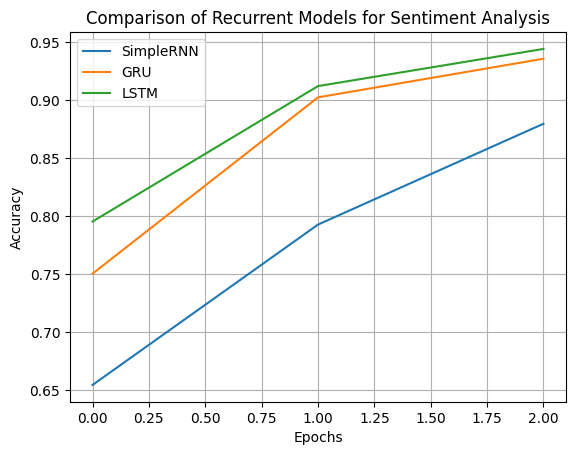

In [5]:
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()